In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print('Done')

Done


In [6]:
ec=pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx')
#rename columns
ec.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,Unnamed: 10,Unnamed: 11
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,NaN,NaN
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,NaN,NaN
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,NaN,NaN
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,NaN,NaN
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,NaN,NaN


In [7]:
column_names={'X1':'Relative_Compactness', 'X2': 'Surface_Area', 'X3': 'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height', 'X6': 'Orientation', 'X7': 'Glazing_Area', 'X8': 'Glazing_Area_Distribution', 'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}
ec=ec.rename(columns=column_names)

ec.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load,Unnamed: 10,Unnamed: 11
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,NaN,NaN
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,NaN,NaN
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,NaN,NaN
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,NaN,NaN
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,NaN,NaN


In [8]:
ec = ec.drop(columns=['Unnamed: 10', 'Unnamed: 11'])
ec.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


<AxesSubplot:xlabel='Relative_Compactness', ylabel='Cooling_Load'>

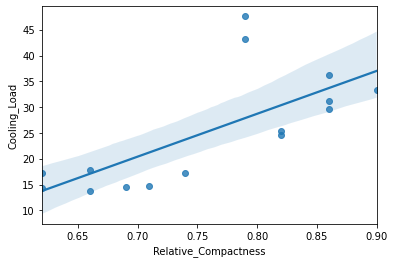

In [9]:
simplinreg_df= ec[['Relative_Compactness', 'Cooling_Load']].sample(15, random_state=2)
sns.regplot(x="Relative_Compactness", y= "Cooling_Load", data= simplinreg_df)

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()
normalised_ec= pd.DataFrame(scaler.fit_transform(ec), columns=ec.columns)
features_ec= normalised_ec.drop(columns=['Heating_Load', 'Cooling_Load'])
heating_target= normalised_ec['Heating_Load']

In [11]:
features_ec.head() 

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution
0,1.000000,0.000000,0.285714,0.000000,1.0,0.000000,0.0,0.0
1,1.000000,0.000000,0.285714,0.000000,1.0,0.333333,0.0,0.0
2,1.000000,0.000000,0.285714,0.000000,1.0,0.666667,0.0,0.0
3,1.000000,0.000000,0.285714,0.000000,1.0,1.000000,0.0,0.0
4,0.777778,0.166667,0.428571,0.111111,1.0,0.000000,0.0,0.0


In [12]:
#MAE 0.063 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(features_ec, heating_target, test_size=0.3, random_state=1)

from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()
linear_model.fit(x_train, y_train)

predicted_values= linear_model.predict(x_test)

from sklearn.metrics import mean_absolute_error
mae= mean_absolute_error(y_test, predicted_values) 
round(mae, 3),

0.063

In [13]:
#RSS 1.823
import numpy as np
rss=np.sum(np.square(y_test - predicted_values))
round(rss, 3) 

1.817

In [14]:
#RMSE 0.089
from sklearn.metrics import mean_squared_error
rmse= np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.089

In [15]:
#R2
from sklearn.metrics import r2_score
r2_score= r2_score(y_test, predicted_values)
round(r2_score, 3)

0.894

In [16]:
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)



Ridge(alpha=0.5)

In [25]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

In [18]:
from sklearn.linear_model 
def get_weights_ec(model, feat, col_name):
    weights= pd.Series(model.coef_, feat.columns).sort_values()
    weights_ec= pd.DataFrame(weights).reset_index()
    weights_ec.columns= ['Features', col_name]
    weights_ec[col_name].round(3)
    return weights_ec


In [26]:
linear_model_weights= get_weights_ec(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_ec= get_weights_ec(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_ec= get_weights_ec(lasso_reg, x_train, 'Lasso_Weight')

final_weights= pd.merge(linear_model_weights, ridge_weights_ec, on='Features')
final_weights= pd.merge(final_weights, lasso_weights_ec, on='Features')
final_weights


,Features,Linear_Model_Weight,Ridge_Weight,Lasso_Weight
0,Relative_Compactness,-0.606412,-0.283471,-0.027719
1,Roof_Area,-0.328099,-0.163192,-0.000000
2,Surface_Area,-0.235022,-0.062275,0.000000
3,Orientation,0.003399,0.003369,0.000000
4,Wall_Area,0.018947,0.103061,0.200087
5,Glazing_Area_Distribution,0.028452,0.029088,0.021431
6,Glazing_Area,0.215042,0.212449,0.206132
7,Overall_Height,0.393549,0.442467,0.463482


# Quiz Data

In [3]:
ec = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')
ec.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
ec.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [5]:
ec.shape

(19735, 29)

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()
ec = ec.drop(columns=['date', 'lights'])
normalised_ec = pd.DataFrame(scaler.fit_transform(ec), columns=ec.columns)

features_ec = normalised_ec.drop(columns='Appliances')
heating_target = normalised_ec['Appliances']

In [10]:
feature = normalised_ec[['T2']]
target = normalised_ec['T6']

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(feature, target, test_size = 0.3, random_state =42)


In [13]:
from sklearn.linear_model import LinearRegression
lnreg=LinearRegression()
lnreg.fit(x_train, y_train)

predicted_values=lnreg.predict(x_test)

In [15]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test, predicted_values)
round(mae, 3)


0.082

In [16]:
import numpy as np
rss=np.sum(np.square(y_test - predicted_values))
round(rss, 3)


66.116

In [17]:
from sklearn.metrics import mean_squared_error
rmse= np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.106

In [18]:
from sklearn.metrics import r2_score
r2_score= r2_score(y_test, predicted_values)
round(r2_score, 3)


0.643

In [27]:
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)

predict=ridge_reg.predict(x_test)

from sklearn.metrics import mean_squared_error
rmse1= np.sqrt(mean_squared_error(y_test, predict))
round(rmse1, 3)


0.106

In [28]:
from sklearn.model_selection import train_test_split
bx_train, bx_test, by_train, by_test=train_test_split(features_ec, heating_target, test_size = 0.3, random_state =42)


In [31]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=0.001)
lasso_reg.fit(bx_train, by_train)

predict2=lasso_reg.predict(bx_test)

from sklearn.metrics import mean_squared_error
rmse2= np.sqrt(mean_squared_error(by_test, predict))
round(rmse2, 3)


0.362

In [32]:
def get_weights_df(model, feat, col_name):
    weights= pd.Series(model.coef_, feat.columns).sort_values()
    weights_ec= pd.DataFrame(weights).reset_index()
    weights_ec.columns= ['Features', col_name]
    weights_ec[col_name].round(3)
    return weights_ec

get_weights_df(lasso_reg, bx_train, 'Weights')

,Features,Weights
0,RH_out,-0.049557
1,RH_8,-0.000110
2,T1,0.000000
3,Tdewpoint,0.000000
4,Visibility,0.000000
5,Press_mm_hg,-0.000000
6,T_out,0.000000
7,RH_9,-0.000000
8,T9,-0.000000
9,T8,0.000000
